In [4]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

#Data

titanic_train = pd.read_csv('titanic_train.csv')
titanic_train = titanic_train.dropna()

In [6]:
#Data Frame Numerical Values
fare = titanic_train.Fare
survived = titanic_train.Survived
sibsp = titanic_train.SibSp
parch = titanic_train.Parch
age = titanic_train.Age
name = titanic_train.Name
pclass = titanic_train.Pclass

([<matplotlib.axis.YTick at 0x1418fb800>,
 [Text(0, 0, 'PassengerId'),
  Text(0, 1, 'Survived'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'Age'),
  Text(0, 4, 'SibSp'),
  Text(0, 5, 'Parch'),
  Text(0, 6, 'Fare')])

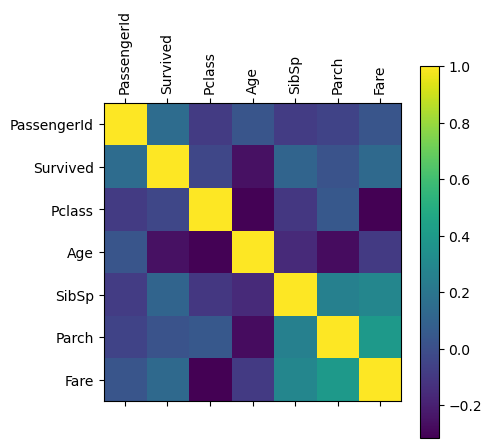

In [20]:
#Correlation Heat Map of all Numerical Values

corr_scores = titanic_train.corr(numeric_only=True)
plt.matshow(corr_scores)
num_labels = len(corr_scores.index)
plt.colorbar()
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index)

Text(0.5, 1.0, 'Age of People Aboard the Titanic')

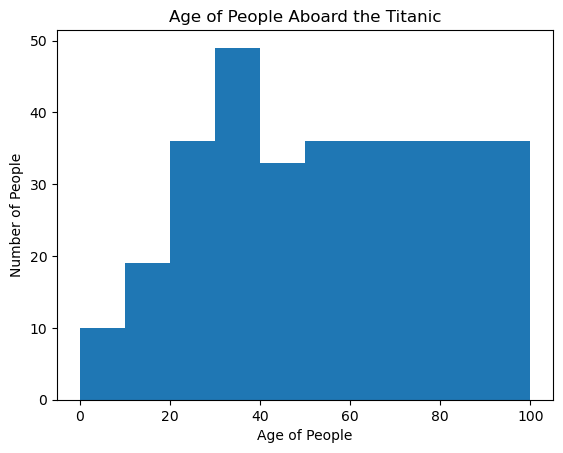

In [38]:
#Histogram of age of people aboard

plt.hist(age, bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel("Age of People")
plt.ylabel("Number of People")
plt.title("Age of People Aboard the Titanic")

Text(0.5, 1.0, 'Port of Embarkation')

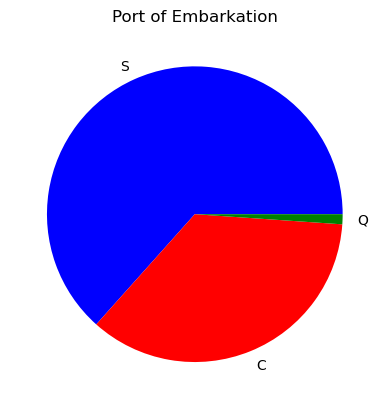

In [8]:
#Pie Chart of port of embarkation
#S -> Southampton
#Q -> Queenstown
#C -> Cherbourg

embarkpiechart = titanic_train["Embarked"].value_counts()
pie_colors = ["blue", "red", "green"]
plt.pie(embarkpiechart, labels=embarkpiechart.index,\
        colors=pie_colors)
plt.title("Port of Embarkation")

In [62]:
#Setup for Line of Best fit for Scatter Plot
#R-Value -> -0.09242385620999939

linear_model = scipy.stats.linregress(age, fare)
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*age+y_intercept
print(linear_model)

LinregressResult(slope=-0.4510625474955362, intercept=94.77386642798255, rvalue=-0.09242385620999939, pvalue=0.21335794745107722, stderr=0.3612023106774366, intercept_stderr=14.063985642433588)


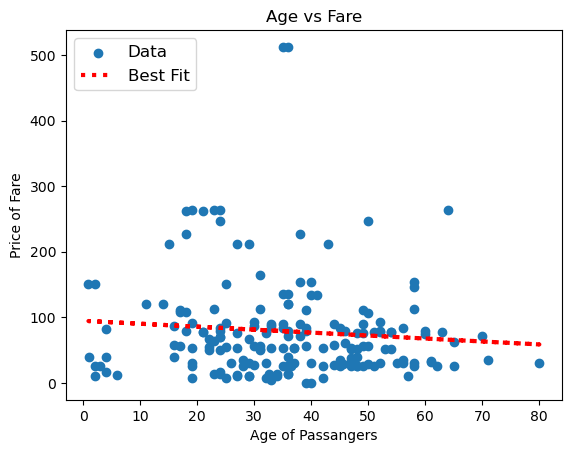

In [68]:
#Scatter Plot of Age Vs Fare Price

plt.scatter(age,fare, label="Data")
plt.plot(age, linear_fit, linewidth=3, color="red", linestyle=":", label="Best Fit")
plt.xlabel("Age of Passangers")
plt.ylabel("Price of Fare")
plt.title("Age vs Fare")
plt.legend(fontsize=12, loc="upper left")

Text(0, 0.5, 'Money Spent on Fare')

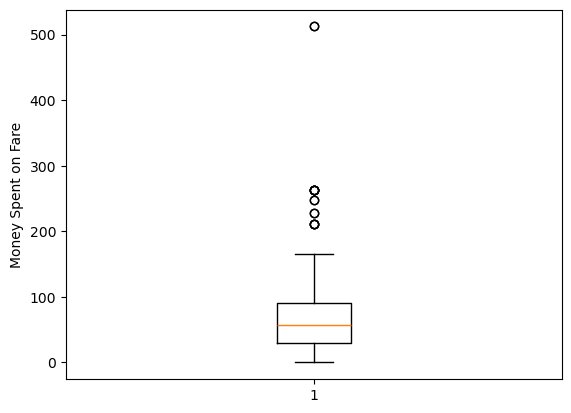

In [12]:
#BoxPlot of the Fare

plt.boxplot(fare)
plt.ylabel("Money Spent on Fare")

In [48]:
#Contigency table comparing Age, Port, and Survived by the Average

pt = pd.pivot_table(titanic_train, values="Age", index=["Embarked"],
                       columns=["Survived"], aggfunc="mean")
print(pt)

Survived          0          1
Embarked                      
C         43.235294  35.416667
Q         44.000000  33.000000
S         40.523810  31.275946


In [78]:
c, p, dof, expected = scipy.stats.chi2_contingency(pt)
print("The P-Value is:", p)

#Chi-Squared Test
#No major correlation since P>0.05

The P-Value is: 0.9618941488583608
